# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_df = pd.merge (study_results, mouse_metadata, on= "Mouse ID", how ="left") 

# Display the data table for preview
combined_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count_mice= combined_mouse_study_df ["Mouse ID"].nunique()
count_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_mouse_study_df[combined_mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mice_duplicate= duplicate_rows ["Mouse ID"].unique()

mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = combined_mouse_study_df[combined_mouse_study_df['Mouse ID'] != 'g989']

cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count= cleaned_df ["Mouse ID"].nunique()
cleaned_mice_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumour_volume_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumour_volume_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumour_volume_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumour_volume_standard_deviation = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumour_volume_SEM = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_of_statistics_df = pd.DataFrame({'Mean Tumor Volume': tumour_volume_mean, 'Median Tumor Volume': tumour_volume_median, 'Tumor Volume Variance': tumour_volume_variance,
                          	'Tumor Volume Std. Dev.':tumour_volume_standard_deviation, 'Tumor Volume Std. Err.': tumour_volume_SEM})

summary_of_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Grouped data inspection

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary_statistics_df = summary_statistics_df.set_index('Drug Regimen')



# Define the title with bold ANSI escape codes and right alignment
title = '\033[1m' + 'Tumor Volume (mm3)' + '\033[0m'
print(title.rjust(80))

summary_statistics_df

                                                      Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

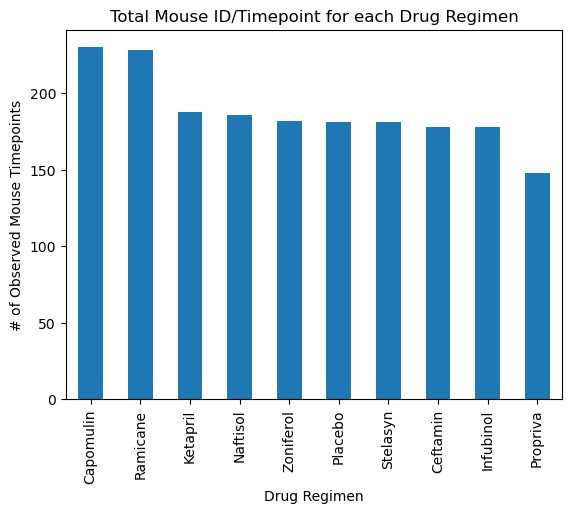

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#To count the number of Mouse ID/timepoints for each drug regimen and sorting in descending order. 
observed_mouse_timepoints = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()
observed_mouse_timepoints_sorted = observed_mouse_timepoints.sort_values(ascending=False)

#Charting the data, giving it a title and labelling the axis. 
observed_mouse_timepoints_chart = observed_mouse_timepoints_sorted.plot(kind="bar", title="Total Mouse ID/Timepoint for each Drug Regimen")
observed_mouse_timepoints_chart.set_xlabel("Drug Regimen")
observed_mouse_timepoints_chart.set_ylabel("# of Observed Mouse Timepoints")

#showing the chart
plt.show()



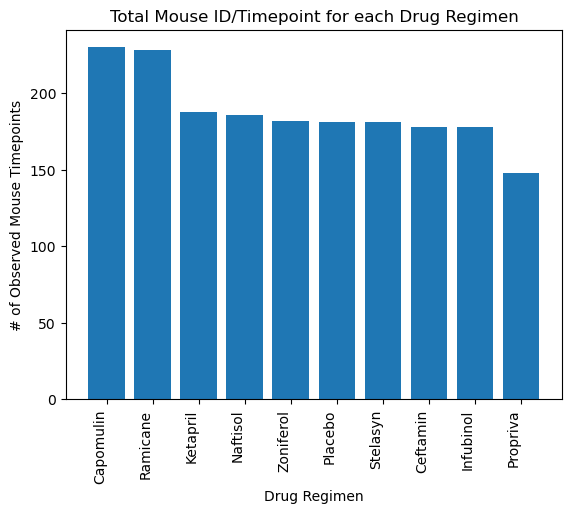

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# To count the number of'Mouse ID' count for each 'Drug Regimen'
observed_mouse_timepoints = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()

# Sort the counts in descending order
observed_mouse_timepoints_sorted = observed_mouse_timepoints.sort_values(ascending=False)

# Create the bar chart using Matplotlib's plt.bar()
plt.bar(observed_mouse_timepoints_sorted.index, observed_mouse_timepoints_sorted.values)

# Set the title, x-axis label, and y-axis label
plt.title("Total Mouse ID/Timepoint for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x-axis labels for better visibility 
plt.xticks(rotation=90, ha='right')

# Show the plot

plt.show()

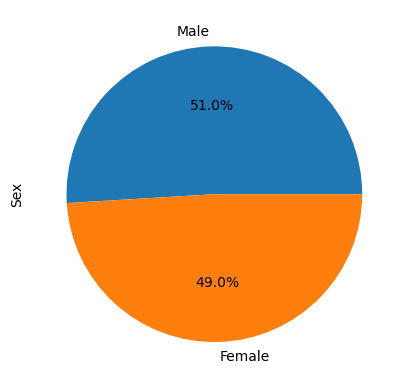

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Count the number of males and females in the sex column
male_female_distribution = cleaned_df['Sex'].value_counts()

#Draw the pie chart and show all labels
male_female_pie_chart = male_female_distribution.plot(kind='pie', autopct='%1.1f%%')
male_female_pie_chart.set_ylabel('Sex')

#show the pie chart
plt.show()


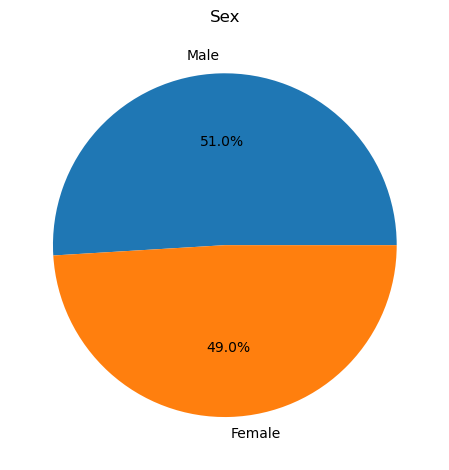

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# #Count the number of males and females in the sex column
male_female_distribution = cleaned_df['Sex'].value_counts()

# Get the labels and sizes for the pie chart
labels = male_female_distribution.index
sizes = male_female_distribution.values

#Draw the pie chart and show all labels
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sex')

#show the pie chart
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
greatest_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(greatest_timepoints, cleaned_df, on=['Mouse ID', 'Timepoint'])

merged_df

 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    # add subset 
    subset = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
     # Append tumor volume data to the list
    tumor_volume_data.append(subset)
    
    # Determine outliers using upper and lower bounds

    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    potential_outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    print(f"Potential outliers for {treatment}: {potential_outliers.tolist()}")

Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


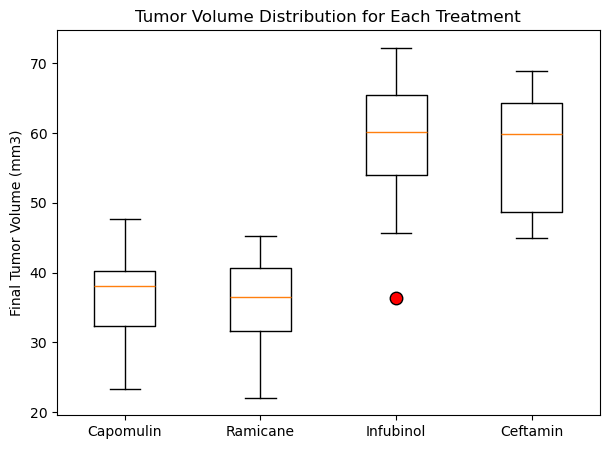

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a box plot
plt.figure(figsize=(7, 5))
box = plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=9))

# Add labels and title
plt.title('Tumor Volume Distribution for Each Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()



## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
